# Universidade Federal do Rio Grande do Sul (UFRGS)   
## Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

 PEC00025: Introduction to Vibration Theory


 Test P1 (2022/1): time and frequency domain analysis of sdof systems

---

**NAME:** Gabriel Orso Garcia <br/>
**CARD:** 00275506

 Instruções

1. Entregar a resolução da prova em arquivo único, com no máximo 10Mb, até as 18h de hoje, 25 de abril de 2022.
2. Recomenda-se verificar atentamente se todas as folhas da resolução foram incluídas no arquivo gerado, pois não serão aceitas entregas posteriores.
3. Na primeira folha do arquivo deve constar claramente o NOME e o cartão de MATRÍCULA.
4. A consulta ao material de estudo e o uso do computador para cálculos são LIVRES.
5. A prova deve ser realizada INDIVIDUALMENTE, sem recorrer ao auxílio de colegas ou outras pessoas! Caso se verifique o descumprimento desta regra, todos os envolvidos na fraude terão a nota da prova zerada.


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import handcalcs.render
from MRPy import *
from scipy.optimize import fsolve
pi = np.pi

## Questão 1

Um cabo com comportamento elástico linear é disposto horizontalmente.
O cabo tem comprimento total $L = 4{\rm m}$, 
rigidez axial $EA = 4000{\rm kN}$, e uma massa $m = 20{\rm kg}$ 
fixada no seu centro. O cabo tem uma protensão inicial $T_0 = 20{\rm kN}$. 
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A rigidez à flexão bem como a massa do cabo são desprezáveis.
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.
O _grau de liberdade_ considerado é o deslocamento vertical da massa $m$.

<img src="PEC00025A_221_P1_Q1.png" alt="Question 1" width="680px"/>


Admitindo-se uma condição de pequenos deslocamentos, pergunta-se:

1. Qual o deslocamento $u_{\rm est}$ devido ao peso próprio?
2. Qual a frequência natural de vibração livre do sistema cabo-massa?
3. Liberando-se a massa a partir da posição $u(0) = 0{\rm m}$, sob ação da gravidade, qual a maior amplitude atingida por $u(t)$? 
4. Desconsiderando-se a parcela estática do deslocamento e dado um deslocamento inicial $u_0 = 4{\rm cm}$, qual o tempo transcorrido até que a amplitude de vibração caia à metade deste valor? 


## Respostas Questão 1:

### 1.1)

O deslocamento do cabo pode ser calculado por uma questão de equilíbrio de forças:


In [2]:
%%render

EA = 4000*1000        # rigidez do cabo
Li = 4/2              # comprimento de cada trecho de cabo
P_b = 20*9.81         # peso do bloco
m = 20                # massa do bloco


<IPython.core.display.Latex object>

A força em cada cabo será:

$$ F_c = 20000 + EA/Li*\epsilon $$

onde $\epsilon$ é o alongamento no cabo e $F_c$ a força no cabo.
Pelo diagrama de corpo livre do sistema, sabemos que:

$$ 2*F_c*sin(\theta) = P_b $$

$$ 2*(20000 + EA/Li*\epsilon)*sin(\theta) = P_b $$

$$ (40000 + 2*EA/Li*\epsilon)*sin(\theta) = P_b $$

$$ 40000*sin(\theta) + 2*EA/Li*\epsilon*sin(\theta) = P_b $$

a deformação $\epsilon$ do cabo será:

$$\epsilon = (Li/cos(\theta) - Li)/Li $$

logo:

$$ 40000*sin(\theta) + 2*EA/Li*(Li/cos(\theta) - Li)/Li*sin(\theta) = P_b $$

e finalmente:

$$ 40000*sin(\theta) + 2*EA/Li*(tan(\theta) - sin(\theta)) - P_b = 0 $$

Defino uma função lambda para achar a resultante de forças no sistema a partir de qualquer angulo $\theta$

In [3]:
summ_y = lambda th: (40000*np.sin(th)+2*EA/Li*(np.tan(th)-np.sin(th))-P_b)
theta = fsolve(summ_y,0)
theta = theta[0]

Utilizando a função fsolve da biblioteca Scipy encontramos:

In [4]:
%%render 10

theta #rad

<IPython.core.display.Latex object>

logo, o deslocamento no cabo será:

In [5]:
%%render

u_est = -Li*np.tan(theta) #m

<IPython.core.display.Latex object>

### 1.2)

A frequência natural de vibração livre do sistema cabo-massa pode ser calculada a partir da rigidez k do sistema e a massa do mesmo.

Conhecendo para o caso estático a força aplicada e o deslocamento gerado, é possível calcular a rigidez fazendo:

In [6]:
%%render

k = -P_b/u_est # N/m

<IPython.core.display.Latex object>

A frequência natural será, portanto:

In [7]:
%%render

omega_n = (k/m)**0.5 #rad
f_n = omega_n/(2*pi) #Hz

<IPython.core.display.Latex object>

### 1.3)

Para resolver essa questão, utilizaremos a MRPy, onde será modelado um sistema no qual é aplicado uma força constante de Pb

Força aplicada ao sistema:


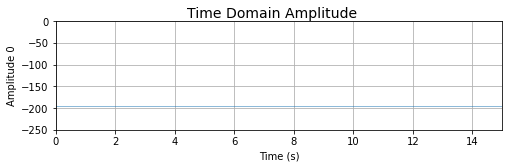

In [8]:
F0 = P_b                             # Força aplicada (N)
Td = 15                             
N  = Td*2048                           

F  = MRPy.zeros(NX=1, N=N, Td=Td) -F0

print("Força aplicada ao sistema:")

F.plot_time(figsize=(8,2), axis_t=[0, Td, -250, 0]);

Deslocamento máximo do sistema: -19.29mm


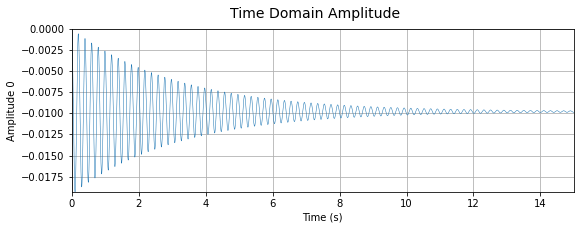

In [9]:
fn = omega_n/2/np.pi      # frequência natural
zt = 0.01                 # damping ratio
u  = F.sdof_Duhamel(fn, zt, U0=0., V0=0.)/m

u.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, u.min(), u.max()])
print('Deslocamento máximo do sistema: {0:6.2f}mm'.format(1000*u.min()))

Pela aproximação de Clough e Penzien teríamos:

In [10]:
%%render

u_din = 2*u_est

<IPython.core.display.Latex object>

o que condiz com o resultado encontrado através da integral de duhamel

### 1.4)

Modificando os dados da questão anterior, resolvemos novamente a integral de Duhamel, dessa vez aplicando uma condição inicial U0 = 4cm e descontando do sistema o deslocamento estático (-9,798*10^-3 metros)

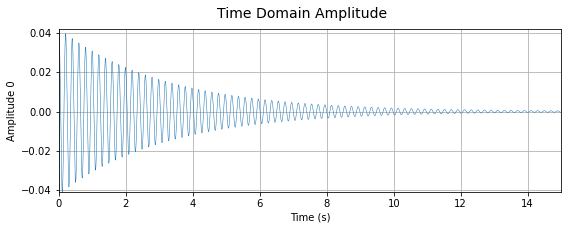

In [11]:
F0 = P_b                             # Força aplicada (N)
Td = 15                              # total integration time (s)
N  = Td*20480                          # number of time step for Td discretization

F  = MRPy.zeros(NX=1, N=N, Td=Td)    # creates a time series filled with zeroes
F[0, 0:N] = -F0                      # fills constant value up to td

fn = omega_n/2/np.pi                 # frequência natural
zt = 0.01                            # damping ratio
U0 = 0.04 - u_est + 0.6
u  = F.sdof_Duhamel(fn, zt, U0=U0, V0=0.)/m - u_est

u.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, u.min(),  u.max()]);

Aproximadamente após dois segundos a amplitude de vibração chega a metade do deslocamento inicial aplicado.

## Questão 2

A massa central do problema anterior é submetida a uma carga transiente, $F(t)$, dada pela função abaixo, 
com amplitude $F_0 = 500{\rm N}$ e duração $T_{\rm d} = 0.5{\rm s}$. 
A variável $\tau$ representa o tempo adimensionalizado por $T_{\rm d}$.

<img src="PEC00025A_221_P1_Q2.png" alt="Question 2" width="480px"/>  


Desconsiderando-se a parcela estática da resposta (devida ao peso próprio), pergunta-se:

1. Qual o maior amplitude de deslocamento atingida?
2. Qual o fator de amplificação dinâmica para este carregamento?


### 2.1)

Novamente, utilizando a MRPy para resolução:

O primeiro gráfico apresenta a carga aplicada na estrutura, enquanto o segundo gráfico apresenta a resposta estrutural do sistema em termos de deslocamento, de onde podemos obter o deslocamento máximo.

A resposta foi resolvida através da integral de Duhamel.

Deslocamento máximo do sistema:  28.42mm


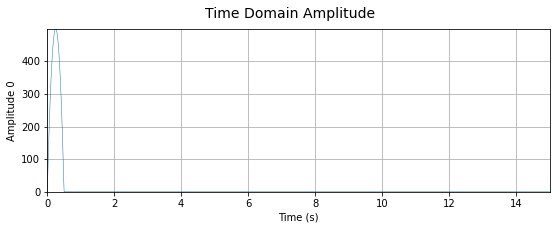

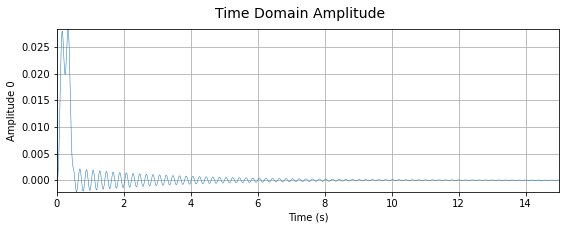

In [12]:
F0 = 500                             # Força aplicada (N)
td = 0.5
Td = 15                              # total integration time (s)
fs = 2048
N  = Td*fs                           # number of time step for Td discretization

t = np.linspace(0,td,int(td*fs))
F = MRPy.zeros(1,Td*fs,fs=fs)
i0 = int(td*fs)

F[0,0:i0] = 4*F0*(t/td - (t/td)**2)
t = np.linspace(0,Td,Td*fs)
u = F.sdof_Duhamel(fn,zt)/m

fn = omega_n/2/np.pi                 # frequência natural
zt = 0.01                            # damping ratio
u  = F.sdof_Duhamel(fn, zt, U0=0.0, V0=0.)/m

F.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, F.min(),  F.max()]);
u.plot_time(fig=2, figsize=(9,3), axis_t=[0, Td, u.min(),  u.max()]);
print('Deslocamento máximo do sistema: {0:6.2f}mm'.format(1000*u.max()))

u_max = u.max()

### 2.2)

O fator de amplificação dinâmico é calculado dividindo-se a resposta máxima do sistema pela resposta estática, portanto:

In [13]:
%%render 3

u_est = F0/k

A = u_max/u_est

<IPython.core.display.Latex object>

## Questão 3

Uma viga com comportamento elástico linear é disposta horizontalmente.
A viga tem comprimento total $L = 4{\rm m}$, 
rigidez à flexão $EI = 6.5{\rm kN m^2}$, e uma massa $m = 20{\rm kg}$ 
fixada no seu centro.
O amortecimento do sistema é $\zeta = 0.01$ (razão do crítico).
A massa da viga é desprezável.
A aceleração da gravidade no local é $g = 9.81{\rm m/s^2}$.
O _grau de liberdade_ considerado é o deslocamento vertical da massa $m$.

<img src="PEC00025A_221_P1_Q3.png" alt="Question 2" width="600px"/>  


Pergunta-se:

1. Qual o deslocamento $u_{\rm est}$ devido ao peso próprio?
2. Qual a frequência natural de vibração livre do sistema viga-massa?
3. Liberando-se a massa a partir da posição $u(0) = 0{\rm m}$, qual a maior amplitude atingida por $u(t)$ devida à ação da gravidade? 
4. Desconsiderando-se a parcela estática do deslocamento e dado um deslocamento inicial $u_0 = 4{\rm cm}$, qual o tempo transcorrido até que a amplitude de vibração caia à metade deste valor? 


### 3.1)

Pela equação da linha elástica sabemos que a flecha causada por uma carga centrada em uma viga é:

$$ u_{est} = -P*L^3 / (48*EI) $$

Portanto, nesse caso:

In [14]:
%%render

EI = 6500 #N/m²
L = 4 #m
P = m*9.81 #N
u_est = -P*L**3/(48*EI) #m

<IPython.core.display.Latex object>

### 3.2)

Para calcular a frequência natural de vibração do sistema, primeiramente calculamos a rigidez, depois disso sao colocadas as frequências em rad/s e Hz

In [15]:
%%render

k = -P/u_est #N/m

omega_n = (k/m)**0.5 #rad/s
f_n = omega_n/(2*pi) #Hz

<IPython.core.display.Latex object>

### 3.3)

Força aplicada ao sistema:


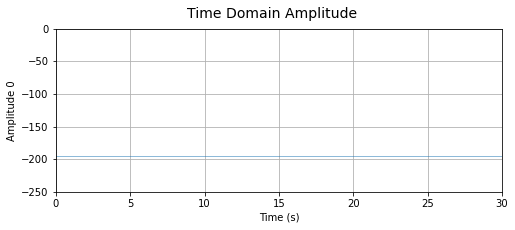

In [16]:
F0 = -P                            # Força aplicada (N)
Td = 30                            
N  = Td*2048                           

F  = MRPy.zeros(NX=1, N=N, Td=Td) + F0

print("Força aplicada ao sistema:")

F.plot_time(figsize=(8,3), axis_t=[0, Td, -250, 0]);

Deslocamento máximo do sistema: -79.25mm


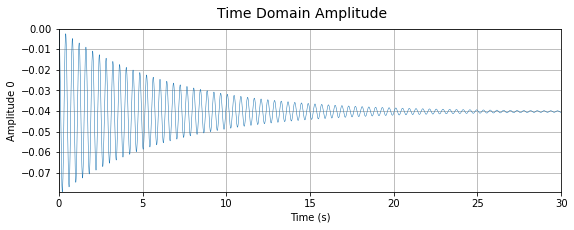

In [17]:
fn = f_n                  # frequência natural
zt = 0.01                 # damping ratio
u  = F.sdof_Duhamel(fn, zt, U0=0., V0=0.)/m

u.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, u.min(), u.max()])
print('Deslocamento máximo do sistema: {0:6.2f}mm'.format(1000*u.min()))

Pela aproximação de Clough e Penzien teríamos:

In [18]:
%%render

u_din = 2*u_est

<IPython.core.display.Latex object>

o que condiz com o resultado encontrado através da integral de duhamel

### 3.4)

Modificando os dados da questão anterior, resolvemos novamente a integral de Duhamel, dessa vez aplicando uma condição inicial U0 = 4cm e descontando do sistema o deslocamento estático (-4,025*10^-2 metros)

Aproximadamente após 5 segundos o sistema chega a metade da amplitude de vibração.


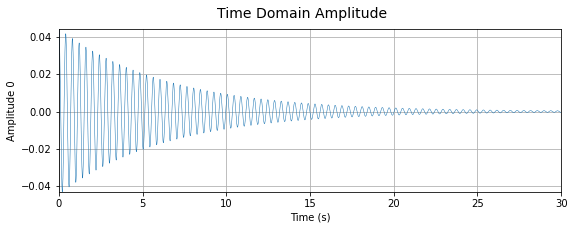

In [19]:
%matplotlib inline
F  = MRPy.zeros(NX=1, N=N, Td=Td)
F[0, 0:N] = -P                       

fn = omega_n/2/np.pi
zt = 0.01
U0 = 0.04-u_est
u  = F.sdof_Duhamel(fn, zt, U0=U0, V0=0.)/m - u_est

u.plot_time(fig=1, figsize=(9,3), axis_t=[0, Td, u.min(),  u.max()]);

print("Aproximadamente após 5 segundos o sistema chega a metade da amplitude de vibração.")

## Questão 4

A extremidade esquerda da viga é submetida a uma aceleração sísmica $a(t)$ com densidade espectral $S_a(f)$,
dada na figura abaixo, onde $\sigma_a = 0.1g$ (10% da gravidade) e $r = 10$ (eixo das frequências em hertz). 

<img src="PEC00025A_221_P1_Q4.png" alt="Question 2" width="420px"/>  


Admitindo-se que a força sísmica na massa central é dada aproximadamente pelo produto da massa pela metade da 
aceleração no apoio esquerdo, conforme indicado na figura da viga, e fazendo-se a hipótese de pequenos deslocamentos, 
pergunta-se:

1. Qual o valor r.m.s. da resposta em deslocamento $u(t)$?
2. Qual o valor r.m.s. da resposta em aceleração $\ddot{u}(t)$?
2. Qual o valor de pico do deslocamento esperado para 1 minuto de excitação estacionária?


### 4.1)
Definindo o periodograma da carga através de uma função do python. Nesse caso, a função foi definida no intervalo de 0 a 15 Hz.

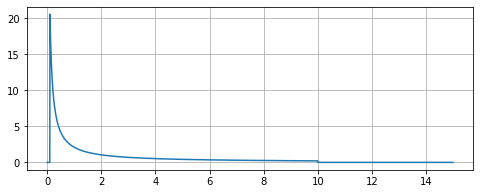

In [20]:
fs=128
f = np.linspace(0,15,15*fs)
Sa = np.linspace(0,15,15*fs)

def sa_freq(f):
    if(f < 0.1 or f>10):
        return 0
    else:
        return (0.1*9.81)**2/(2*np.log(10)*f)
    
    
for i in range(15*fs):
    Sa[i] = sa_freq(f[i])*m/2
    
F = MRPy.from_periodogram(Sa, fs)/2
    
plt.figure(1, figsize=(8, 3), clear=True)
plt.plot(f, Sa)
plt.grid(1)


Podemos calcular o espectro da parte flutuante da resposta em deslocamento $Su(\omega)$ como:

$$ Su(\omega) = |H(\omega)|^2*SF(\omega) $$

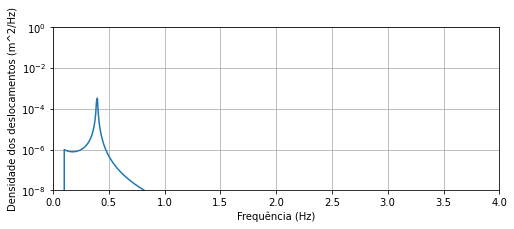

In [21]:
H2 = lambda w: 1/( (1 - (w/fn)**2)**2 + (2*zt*(w/fn))**2 )/(k**2)
SU = H2(2*np.pi*f)*Sa
plt.figure(5, figsize=(8,3))
plt.semilogy(f, SU)
plt.grid(True)
plt.axis([0, 4, 1e-8, 1e0])
plt.xlabel('Frequência (Hz)');
plt.ylabel('Densidade dos deslocamentos (m^2/Hz)');

In [22]:
sU = np.sqrt(np.trapz(SU, f))
print('Valor r.m.s. da parte flutuante da resposta em deslocamento é igual a área do gráfico acima.')
print('a função np.trapz() foi utilizada para chegar ao valor r.m.s de: {0:3.2f}cm.\n'.format(100*sU))

Valor r.m.s. da parte flutuante da resposta em deslocamento é igual a área do gráfico acima.
a função np.trapz() foi utilizada para chegar ao valor r.m.s de: 0.25cm.



### 4.2)

Como temos a resposta em relação ao tempo, podemos derivá-la duas vezes utilizando a função numpy.diff() para obter a aceleração em cada tempo t:

Assim, o valor r.m.s. será:

$$ r.m.s_a^2 = \bar{a}^2 + std(a)^2 $$

Valor r.m.s. da resposta em aceleração é 13.27m/s².



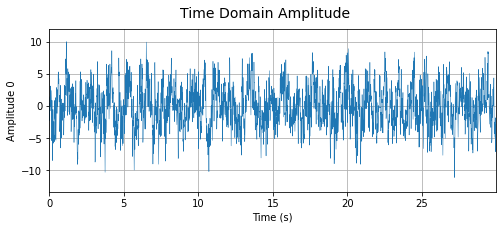

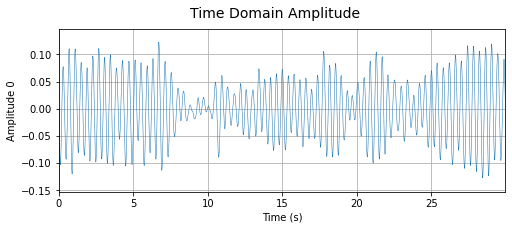

In [23]:
F.plot_time(fig = 1,figsize=(8,3))
uF = F.sdof_Fourier(fn,zt)
uF.plot_time(fig = 2,figsize=(8,3))
v = np.diff(uF[0])*fs
a = np.diff(v)*fs
a_rms = (np.mean(a)**2 + np.std(a)**2)**0.5
print('Valor r.m.s. da resposta em aceleração é {0:3.2f}m/s².\n'.format(a_rms))

### 4.3)

Utilizando a fórmula de davenport e auxílio do python para a integração através do cálculo da densidade espectral dos deslocamentos, obtemos:

$$g = \sqrt{2 \ln (\nu_0 T)} + \frac{0.5772}{\sqrt{2 \ln (\nu_0 T)}}$$


$$ \nu_0 = \sqrt{\frac{\int_0^\infty{f^2 S_{U}(f) \; df}}
                    {\int_0^\infty{    S_{U}(f) \; df}}} $$


In [24]:
u_sim = MRPy.from_periodogram(SU, fs)
sU = np.std(u_sim)             # r.m.s. da parte flutuante
pU = np.max(np.abs(u_sim))     # pico
gU = pU/sU                     # fator de pico
sU2 = np.trapz(SU, f)
sU4 = np.trapz(f*f*SU, f)
nu   = np.sqrt(sU4/sU2)
lnu  = np.sqrt(2*np.log(60*nu))
g    = lnu + 0.5772/lnu

print('Fator de Pico: {0:4.3f}  '.format(g ))

Fator de Pico: 2.743  
